## 🛒 Project 1: Sales Data Analysis

## Step 1: Import Libraries and Create Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    "Date": ["2025-01-01","2025-01-02","2025-01-02","2025-01-03","2025-01-03",
             "2025-01-04","2025-01-05","2025-01-05","2025-01-06","2025-01-06"],
    "Product": ["Shirt","Shoes","Laptop","Shirt","Mobile",
                "Shoes","Laptop","Shirt","Mobile","Shoes"],
    "Category": ["Clothing","Footwear","Electronics","Clothing","Electronics",
                 "Footwear","Electronics","Clothing","Electronics","Footwear"],
    "Quantity": [2,1,1,3,2,2,1,1,1,3],
    "Price": [500,2000,50000,500,20000,1800,48000,450,21000,2200],
    "Region": ["North","South","East","West","North","East","South","North","West","South"]
}

df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])
df["Total_Sales"] = df["Quantity"] * df["Price"]

print(df)


        Date Product     Category  Quantity  Price Region  Total_Sales
0 2025-01-01   Shirt     Clothing         2    500  North         1000
1 2025-01-02   Shoes     Footwear         1   2000  South         2000
2 2025-01-02  Laptop  Electronics         1  50000   East        50000
3 2025-01-03   Shirt     Clothing         3    500   West         1500
4 2025-01-03  Mobile  Electronics         2  20000  North        40000
5 2025-01-04   Shoes     Footwear         2   1800   East         3600
6 2025-01-05  Laptop  Electronics         1  48000  South        48000
7 2025-01-05   Shirt     Clothing         1    450  North          450
8 2025-01-06  Mobile  Electronics         1  21000   West        21000
9 2025-01-06   Shoes     Footwear         3   2200  South         6600


### Step 2: Data Cleaning

In [2]:
# Check missing values
print(df.isnull().sum())

# Remove duplicates (if any)
df = df.drop_duplicates()

# Ensure consistent categories
df["Category"] = df["Category"].str.title()

print("✅ Data cleaned successfully")


Date           0
Product        0
Category       0
Quantity       0
Price          0
Region         0
Total_Sales    0
dtype: int64
✅ Data cleaned successfully


### Step 3: Descriptive Statistics

In [3]:
print("Total Revenue:", df["Total_Sales"].sum())
print("Average Sales per Transaction:", df["Total_Sales"].mean())
print("\nTop Selling Product:\n", df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False).head(1))
print("\nSales by Category:\n", df.groupby("Category")["Total_Sales"].sum())
print("\nSales by Region:\n", df.groupby("Region")["Total_Sales"].sum())

Total Revenue: 174150
Average Sales per Transaction: 17415.0

Top Selling Product:
 Product
Laptop    98000
Name: Total_Sales, dtype: int64

Sales by Category:
 Category
Clothing         2950
Electronics    159000
Footwear        12200
Name: Total_Sales, dtype: int64

Sales by Region:
 Region
East     53600
North    41450
South    56600
West     22500
Name: Total_Sales, dtype: int64


### STEP-4:Data Visulasation

### 📌 (a) Bar Chart – Top Products by Sales

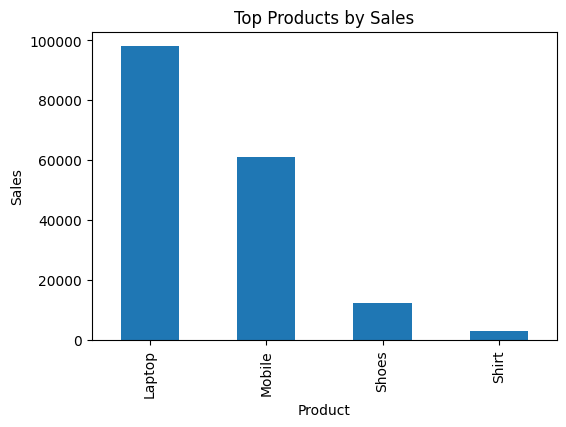

In [4]:
df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False).plot(
    kind="bar", figsize=(6,4), title="Top Products by Sales", ylabel="Sales"
)
plt.show()

### 📌 (b) Pie Chart – Category Contribution

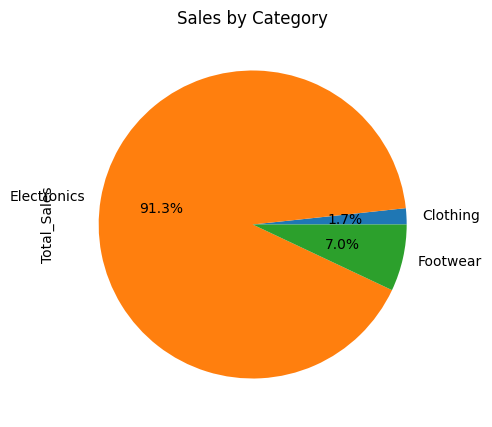

In [5]:
df.groupby("Category")["Total_Sales"].sum().plot(
    kind="pie", autopct="%1.1f%%", figsize=(5,5), title="Sales by Category"
)
plt.show()

### 📌 (c) Line Chart – Sales Trend Over Time

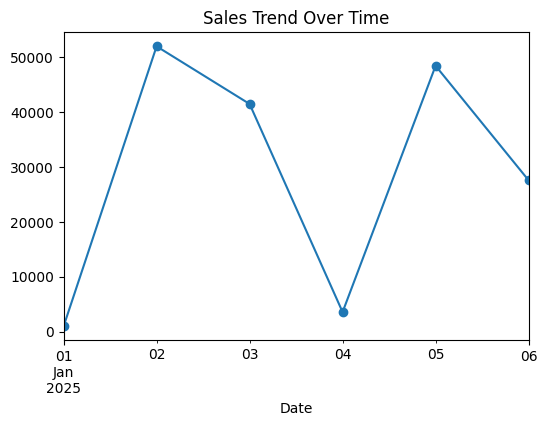

In [6]:
df.groupby("Date")["Total_Sales"].sum().plot(
    kind="line", marker="o", figsize=(6,4), title="Sales Trend Over Time"
)
plt.show()

### 📌 (d) Stacked Column Chart – Category-wise Sales per Date

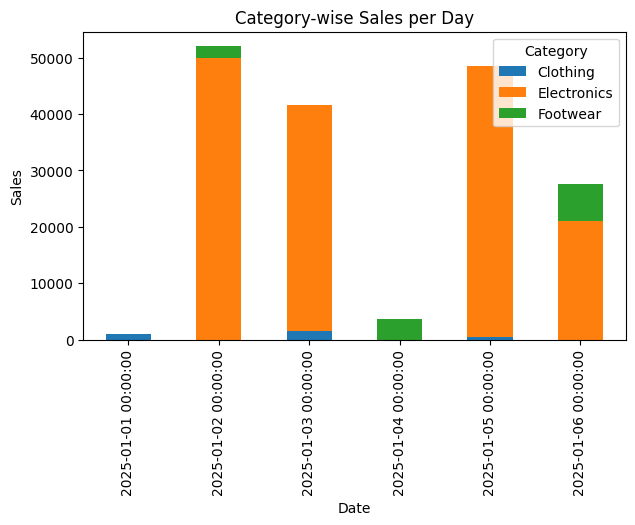

In [9]:
pivot = df.pivot_table(values="Total_Sales", index="Date", columns="Category", aggfunc="sum")
pivot.plot(kind="bar", stacked=True, figsize=(7,4), title="Category-wise Sales per Day")
plt.ylabel("Sales")
plt.show()